In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.decomposition import PCA

In [9]:
df = pd.read_excel('credit_card_default.xls',header = 1)

In [10]:
df.rename({'default payment next month' : 'DEFAULT'}, axis = 'columns', inplace = True)

In [11]:
df.drop('ID', axis = 1, inplace= True)

In [12]:
df = df.loc[(df['EDUCATION']!=0)&(df['MARRIAGE']!=0)]

In [13]:
df_no_default = df[df['DEFAULT'] == 0]
df_yes_default = df[df['DEFAULT'] == 1]

In [14]:
df_no_default_downsampled = resample(df_no_default, replace=False, n_samples=6631)
df_yes_default_downsampled = resample(df_yes_default, replace=False, n_samples=6631)

In [15]:
df_small = pd.concat([df_no_default_downsampled, df_yes_default_downsampled])

In [16]:
X = df_small.drop('DEFAULT', axis = 1).copy()
Y = df_small['DEFAULT'].copy()

In [17]:
X_encoded = pd.get_dummies(X, columns=['MARRIAGE', 'SEX', 'EDUCATION', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'], dtype = 'float32')

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)
len(X_train)

9946

In [19]:
clf_svm = SVC(kernel='rbf', gamma = 'auto', verbose=True)
clf_svm.fit(X_train_scaled, Y_train)

[LibSVM].......*...*
optimization finished, #iter = 10429
obj = -6129.203900, rho = 0.031132
nSV = 6766, nBSV = 6090
Total nSV = 6766


SVC(gamma='auto', verbose=True)

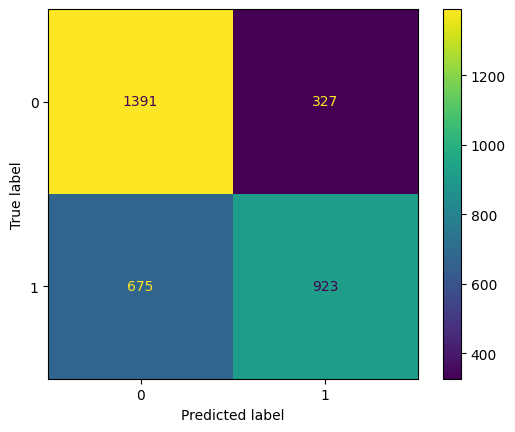

In [20]:
disp=ConfusionMatrixDisplay(confusion_matrix(Y_test, clf_svm.predict(X_test_scaled)))
disp.plot()
plt.show()

In [67]:
param_grid = [{'C':np.linspace(9.55,9.65,10),'gamma':np.linspace(0.012,0.014,10), 'kernel':['rbf'], 'degree': [1]}]

In [68]:
optimal_params = GridSearchCV(SVC(), param_grid, cv =2, scoring='balanced_accuracy',n_jobs=-1, verbose = 2)

In [69]:
optimal_params.fit(X_train_scaled, Y_train)

Fitting 2 folds for each of 100 candidates, totalling 200 fits
[CV] END C=9.55, degree=1, gamma=0.012222222222222223, kernel=rbf; total time=   2.3s
[CV] END C=9.55, degree=1, gamma=0.012222222222222223, kernel=rbf; total time=   2.3s
[CV] END C=9.55, degree=1, gamma=0.012666666666666666, kernel=rbf; total time=   2.2s
[CV] END C=9.55, degree=1, gamma=0.012888888888888889, kernel=rbf; total time=   2.2s
[CV] END ..........C=9.55, degree=1, gamma=0.012, kernel=rbf; total time=   2.3s
[CV] END C=9.55, degree=1, gamma=0.012666666666666666, kernel=rbf; total time=   2.3s
[CV] END C=9.55, degree=1, gamma=0.012444444444444445, kernel=rbf; total time=   2.3s
[CV] END ..........C=9.55, degree=1, gamma=0.012, kernel=rbf; total time=   2.4s
[CV] END C=9.55, degree=1, gamma=0.012444444444444445, kernel=rbf; total time=   2.3s
[CV] END C=9.55, degree=1, gamma=0.012888888888888889, kernel=rbf; total time=   2.3s
[CV] END C=9.55, degree=1, gamma=0.013777777777777778, kernel=rbf; total time=   2.0s
[

GridSearchCV(cv=2, estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': array([9.55      , 9.56111111, 9.57222222, 9.58333333, 9.59444444,
       9.60555556, 9.61666667, 9.62777778, 9.63888889, 9.65      ]),
                          'degree': [1],
                          'gamma': array([0.012     , 0.01222222, 0.01244444, 0.01266667, 0.01288889,
       0.01311111, 0.01333333, 0.01355556, 0.01377778, 0.014     ]),
                          'kernel': ['rbf']}],
             scoring='balanced_accuracy', verbose=2)

In [70]:
optimal_params.best_params_

{'C': 9.616666666666667,
 'degree': 1,
 'gamma': 0.013777777777777778,
 'kernel': 'rbf'}

In [42]:
optimal_params.best_params_

{'C': 9.796122448979592, 'degree': 1, 'gamma': 0.01, 'kernel': 'rbf'}

In [71]:
clf_svm = SVC(degree = 1, kernel='rbf', gamma = 0.01377777, C = 9.61666666, verbose=True)
clf_svm.fit(X_train_scaled, Y_train)

[LibSVM]..................*..........*
optimization finished, #iter = 28158
obj = -58750.438956, rho = 1.345470
nSV = 6615, nBSV = 6082
Total nSV = 6615


SVC(C=9.61666666, degree=1, gamma=0.01377777, verbose=True)

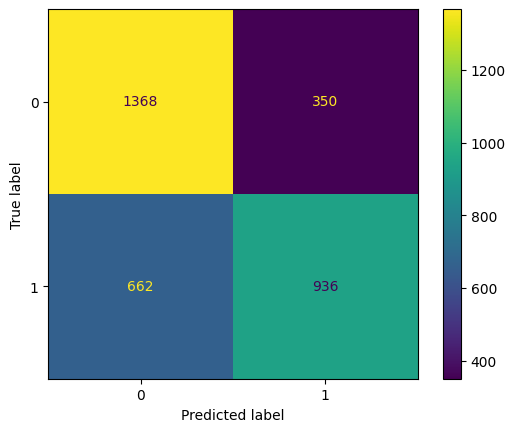

In [72]:
disp=ConfusionMatrixDisplay(confusion_matrix(Y_test, clf_svm.predict(X_test_scaled)))
disp.plot()
plt.show()

81.2%, 18.7%

41.8%, 56.8%

88.8%, 11.2%

49.8%, 50.2%

In [ ]:
import pandas as pd
data = pd.read_csv('data.csv')